# Pergunta

O IHD(indice de desenvolvimento humano) é um indice calculado por 3 fatores principais sendo eles:expectativa de vida,anos médios de estudos e renda per capita.Tendo em vista tal indice,é possivel que a densidade populacional e a transparência internacional acerca da corrupção de um país interfira em seu IDH?





# Introdução:





In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [3]:
#Leitura dos arquivos
IDH = pd.read_excel('Hdi.xlsx')
Corrupcao = pd.read_excel('Corrupcao.xlsx')
Population= pd.read_excel('Population.xlsx')

In [4]:
#Manter para um unico ano
IDh_2008 = IDH.loc[:, ["HDI", 2008]]
Corrupcao_2008 = Corrupcao.loc[:, ["Corrupcao", 2008]]
Population_2008 = Population.loc[:, ["Pop", '2008']]

In [5]:
#Mudança de indice
IDH_idx = IDh_2008.set_index('HDI')
corrup_idx = Corrupcao_2008.set_index('Corrupcao')
Population_idx = Population_2008.set_index('Pop')




In [6]:
#Renomear colunas
pt = IDH_idx.join(corrup_idx, how='inner', lsuffix='_IDH', rsuffix='_Corrupcao')
pt.head(173)

,2008_IDH,2008_Corrupcao
Afghanistan,0.370,1.3
Albania,0.733,3.2
Algeria,0.686,2.8
Angola,0.476,1.9
Argentina,0.786,2.9
Armenia,0.719,2.7
Australia,0.924,8.7
Austria,0.876,7.9
Azerbaijan,NaN,2.3
Bahrain,0.806,5.1


In [7]:
#Adicionando a terceira coluna

Junto = pt.join(Population_idx, how="inner",)

In [8]:
##Shape do frame
Junto.shape


(173, 3)

In [9]:
#Junto.loc[['Afghanistan','Albania','Argentina','Armenia','Belarus','Bolivia','Bosnia and Herzegovina','Brazil','Bulgaria','Cambodia','Cameroon','Central African Republic','Chile','Colombia','Costa Rica','Croatia','Ecuador','Egypt','Hungary','Iraq','Malaysia','Mexico','Montenegro','Paraguay','Peru','Qatar','Romania','Russia','Serbia','Sri Lanka','Tajikistan','Tanzania','Thailand','Timor-Leste','Turkey','Ukraine','United States','Uruguay','New Zealand']].sort_values('2008_IDH')
Junto.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)
Junto.sort_values('2008_IDH').head(68)



,2008_IDH,2008_Corrupcao,2008
"Congo, Dem. Rep.",0.270,1.9,26.643
Niger,0.282,2.9,11.405
Burundi,0.301,1.8,285.384
Mozambique,0.304,2.5,27.861
Chad,0.316,1.6,8.297
Burkina Faso,0.321,3.6,56.625
Sierra Leone,0.325,2.2,78.229
Central African Republic,0.327,2.0,6.803
Liberia,0.328,3.1,32.850
Zimbabwe,0.338,2.2,31.865


<function matplotlib.pyplot.show>

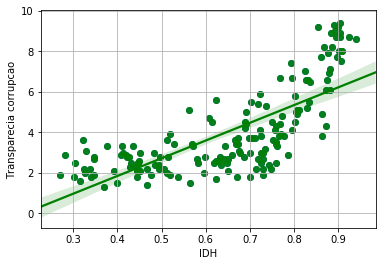

In [10]:
plt.scatter(Junto['2008_IDH'],Junto['2008_Corrupcao'])
sns.regplot(Junto["2008_IDH"],Junto["2008_Corrupcao"], color=('green'))
plt.xlabel('IDH')
plt.ylabel('Transparecia corrupcao')
plt.grid(True)
plt.show








<function matplotlib.pyplot.show>

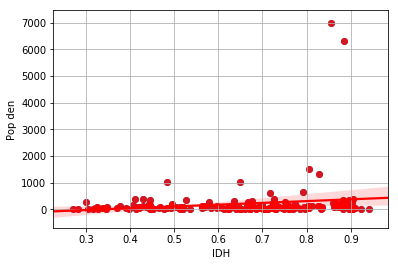

In [11]:
plt.scatter(Junto['2008_IDH'],Junto['2008'])
sns.regplot(Junto["2008_IDH"],Junto["2008"], color=('red'))
plt.xlabel('IDH')
plt.ylabel('Pop den')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show>

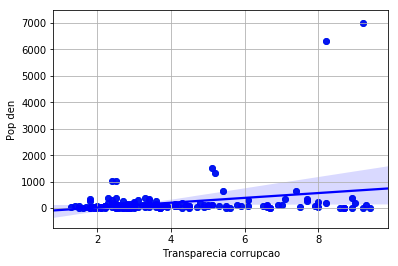

In [12]:
plt.scatter(Junto['2008_Corrupcao'],Junto['2008'])
sns.regplot(Junto["2008_Corrupcao"],Junto["2008"], color=('blue'))
plt.xlabel('Transparecia corrupcao')
plt.ylabel('Pop den')
plt.grid(True)
plt.show

In [13]:
Junto.describe()

,2008_IDH,2008_Corrupcao,2008
count,165.000000,165.000000,165.000000
mean,0.649594,4.027879,207.767133
std,0.179619,2.120705,745.490378
min,0.270000,1.300000,1.703000
25%,0.495000,2.500000,29.759000
50%,0.688000,3.300000,70.084000
75%,0.792000,5.100000,130.018000
max,0.941000,9.400000,6987.139000


In [14]:
#Salvar em arquivo csv
Junto.to_csv('Dataframe.csv', sep='\t', encoding='utf-8',index=True)

In [15]:
Junto.corr('pearson')

,2008_IDH,2008_Corrupcao,2008
2008_IDH,1.000000,0.740279,0.161697
2008_Corrupcao,0.740279,1.000000,0.259717
2008,0.161697,0.259717,1.000000


In [16]:
print(Junto.max(numeric_only=True) - Junto.min(numeric_only=True))



2008_IDH             0.671
2008_Corrupcao       8.100
2008              6985.436
dtype: float64


In [17]:
print(Junto.var())#Variancia

2008_IDH               0.032263
2008_Corrupcao         4.497389
2008              555755.903780
dtype: float64


In [18]:
print(Junto.std())#desvio padrao

2008_IDH            0.179619
2008_Corrupcao      2.120705
2008              745.490378
dtype: float64


In [19]:
print(Junto.skew())#Obliquidade

2008_IDH         -0.361505
2008_Corrupcao    1.065666
2008              8.078803
dtype: float64


In [20]:
print(Junto.kurtosis())#Curtose

2008_IDH          -0.979146
2008_Corrupcao     0.091195
2008              68.564554
dtype: float64


In [21]:
print(Junto.corr())##Correlevancia

                2008_IDH  2008_Corrupcao      2008
2008_IDH        1.000000        0.740279  0.161697
2008_Corrupcao  0.740279        1.000000  0.259717
2008            0.161697        0.259717  1.000000


Conclusao

....



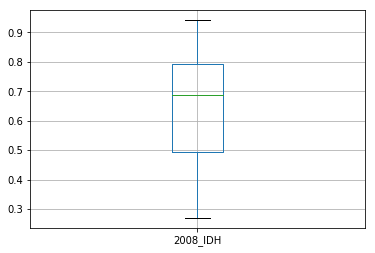

In [22]:
Junto.boxplot('2008_IDH')

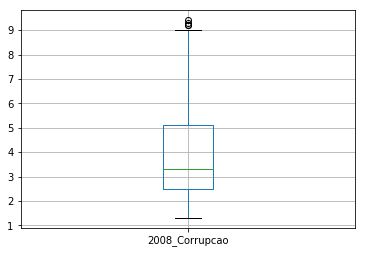

In [24]:
Junto.boxplot('2008_Corrupcao')

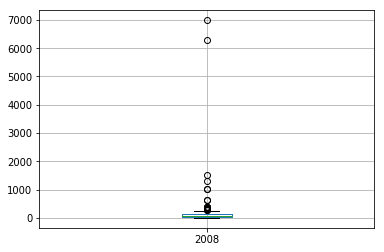

In [25]:
Junto.boxplot('2008')